# Infnet
## Fundamentos da Infraestrutura para Big Data: Volume
### Etapa 08:Machine Learning com Spark
#### Prof.: Jean Machado

In [0]:
# Importa biblioteca PySpark SQL
from pyspark.sql import SparkSession

# Cria sessção
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Cria dataframe de exemplo
df = spark.createDataFrame([{"MSG": "Turma"} for x in range(10000)])

# Mosta apenas 3 elementos
df.show(3)

+-----+
|  MSG|
+-----+
|Turma|
|Turma|
|Turma|
+-----+
only showing top 3 rows



# Preparação de dados e transformações com Spark

In [0]:
# Normalizar Dados Numéricos
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

# Criação de Dataframe com dado de exemplo em vetor
features_df = spark.createDataFrame([
    (1, Vectors.dense([13.0,15000.0,2.0]),),
    (2, Vectors.dense([20.0,30000.0,2.0]),),
    (3, Vectors.dense([30.0,40000.0,3.0]),),
    
],["id", "features"] )
features_df.show()

+---+------------------+
| id|          features|
+---+------------------+
|  1|[13.0,15000.0,2.0]|
|  2|[20.0,30000.0,2.0]|
|  3|[30.0,40000.0,3.0]|
+---+------------------+



In [0]:
# Aplicando transformação MinMaxScaler 
# MinMaxScaler é uma das classes favoritas fornecidas com a maioria das bibliotecas de aprendizado de máquina. 
# Dimensionou os dados entre 0 e 1.
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.MinMaxScaler.html
features_scaler = MinMaxScaler(inputCol = "features", outputCol = "sfeatures")
smodel = features_scaler.fit(features_df)
sfeatures_df = smodel.transform(features_df)
sfeatures_df.show(3,False)

+---+------------------+-------------------------------------------+
|id |features          |sfeatures                                  |
+---+------------------+-------------------------------------------+
|1  |[13.0,15000.0,2.0]|(3,[],[])                                  |
|2  |[20.0,30000.0,2.0]|[0.4117647058823529,0.6000000000000001,0.0]|
|3  |[30.0,40000.0,3.0]|[1.0,1.0,1.0]                              |
+---+------------------+-------------------------------------------+



In [0]:
# StandardScaler 
# Ele normaliza os dados entre -1 e 1. 
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StandardScaler.html
from pyspark.ml.feature import  StandardScaler

# Aplicando modelo StandardScaler
features_stand_scaler = StandardScaler(inputCol = "features", outputCol = "sfeatures", withStd=True, withMean=True)
stmodel = features_stand_scaler.fit(features_df)
stand_sfeatures_df = stmodel.transform(features_df)
stand_sfeatures_df.show(3,False)

+---+------------------+-------------------------------------------------------------+
|id |features          |sfeatures                                                    |
+---+------------------+-------------------------------------------------------------+
|1  |[13.0,15000.0,2.0]|[-0.9363291775690445,-1.059625885652035,-0.5773502691896261] |
|2  |[20.0,30000.0,2.0]|[-0.11704114719613057,0.1324532357065045,-0.5773502691896261]|
|3  |[30.0,40000.0,3.0]|[1.0533703247651751,0.9271726499455308,1.1547005383792515]   |
+---+------------------+-------------------------------------------------------------+



In [0]:
# Bucketize 
# Os conjuntos de dados reais vêm com vários e grandes intervalos e, às vezes, é aconselhável transformar os dados em buckets bem definidos.
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Bucketizer.html
from pyspark.ml.feature import  Bucketizer
from pyspark.ml.linalg import Vectors
# Define the splits for buckets
splits = [-float("inf"), -10, 0.0, 10, float("inf")]
b_data = [(-800.0,), (-10.5,), (-1.7,), (0.0,), (8.2,), (90.1,)]
b_df = spark.createDataFrame(b_data, ["features"])
b_df.show()

+--------+
|features|
+--------+
|  -800.0|
|   -10.5|
|    -1.7|
|     0.0|
|     8.2|
|    90.1|
+--------+



In [0]:
# Transformando o dado em buckets
bucketizer = Bucketizer(splits=splits, inputCol= "features", outputCol="bfeatures")
bucketed_df = bucketizer.transform(b_df)
bucketed_df.show()

+--------+---------+
|features|bfeatures|
+--------+---------+
|  -800.0|      0.0|
|   -10.5|      0.0|
|    -1.7|      1.0|
|     0.0|      2.0|
|     8.2|      2.0|
|    90.1|      3.0|
+--------+---------+



In [0]:
# NLP - Tokenizar dados de texto
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Tokenizer.html
# O processamento de linguagem natural (NLP) é uma das principais aplicações do aprendizado de máquina. 
# Um dos primeiros passos para o NLP é tokenizar o texto em palavras (token).
# Podemos utilizar a classe Tokenizer com SparkML para executar esta tarefa.
from pyspark.ml.feature import  Tokenizer
sentences_df = spark.createDataFrame([
    (1, "Essa é uma introdução ao SparkMlib"),
    (2, "Mlib inclui bibliotecas de classificação e regressão"),
    (3, "Também dá suporte à transformação e padronização de dados"),
    
], ["id", "sentences"])
sentences_df.show(3, False)

+---+---------------------------------------------------------+
|id |sentences                                                |
+---+---------------------------------------------------------+
|1  |Essa é uma introdução ao SparkMlib                       |
|2  |Mlib inclui bibliotecas de classificação e regressão     |
|3  |Também dá suporte à transformação e padronização de dados|
+---+---------------------------------------------------------+



In [0]:
# Tokenização
sent_token = Tokenizer(inputCol = "sentences", outputCol = "words")
sent_tokenized_df = sent_token.transform(sentences_df)
sent_tokenized_df.take(10)

Out[90]: [Row(id=1, sentences='Essa é uma introdução ao SparkMlib', words=['essa', 'é', 'uma', 'introdução', 'ao', 'sparkmlib']),
 Row(id=2, sentences='Mlib inclui bibliotecas de classificação e regressão', words=['mlib', 'inclui', 'bibliotecas', 'de', 'classificação', 'e', 'regressão']),
 Row(id=3, sentences='Também dá suporte à transformação e padronização de dados', words=['também', 'dá', 'suporte', 'à', 'transformação', 'e', 'padronização', 'de', 'dados'])]

In [0]:
# TF-IDF
# https://spark.apache.org/docs/latest/mllib-feature-extraction.html#tf-idf
# Term Frequency Inverse Document Frequency (TF-IDF) é um método de vetorização de características amplamente utilizado na mineração de texto para refletir a importância de um termo para um documento. 
# Usando os dados tokenizados acima, vamos aplicar o TF-IDF
from pyspark.ml.feature import HashingTF, IDF
hashingTF = HashingTF(inputCol = "words", outputCol = "rawfeatures", numFeatures = 20)
sent_fhTF_df = hashingTF.transform(sent_tokenized_df)
sent_fhTF_df.take(1)

Out[91]: [Row(id=1, sentences='Essa é uma introdução ao SparkMlib', words=['essa', 'é', 'uma', 'introdução', 'ao', 'sparkmlib'], rawfeatures=SparseVector(20, {3: 1.0, 6: 1.0, 11: 1.0, 13: 1.0, 14: 1.0, 15: 1.0}))]

In [0]:
idf = IDF(inputCol = "rawfeatures", outputCol = "idffeatures")
idfModel = idf.fit(sent_fhTF_df)
tfidf_df = idfModel.transform(sent_fhTF_df)
tfidf_df.take(1)

Out[92]: [Row(id=1, sentences='Essa é uma introdução ao SparkMlib', words=['essa', 'é', 'uma', 'introdução', 'ao', 'sparkmlib'], rawfeatures=SparseVector(20, {3: 1.0, 6: 1.0, 11: 1.0, 13: 1.0, 14: 1.0, 15: 1.0}), idffeatures=SparseVector(20, {3: 0.6931, 6: 0.6931, 11: 0.6931, 13: 0.6931, 14: 0.2877, 15: 0.6931}))]

# Machine Learning

In [0]:
# Clustering usando o PySpark
# Clustering é uma técnica de aprendizado de máquina em que os dados são agrupados em um número razoável de classes usando os recursos de entrada. 
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans, BisectingKMeans
import glob

In [0]:
# Downloading the clustering dataset
# https://docs.databricks.com/files/download-internet-files.html#language-python
#!wget -q 'https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/clustering_dataset.csv' # Baixa arquivo
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/clustering_dataset.csv", "/tmp/clustering_dataset.csv") #Baixa arquivo e inclui na pasta tmp

dbutils.fs.cp("file:/tmp/clustering_dataset.csv", "dbfs:/tmp/clustering_dataset.csv") # Copia arquivo para o DBFS

Out[55]: True

In [0]:
# Leitura de Dados
#clustering_file_name ='file:/tmp/clustering_dataset.csv' # Leitura Sistema de Arquivos SO
#clustering_file_name = 'dbfs:/tmp/clustering_dataset.csv' # Leitura DBFS
clustering_file_name ='/FileStore/tables/clustering_dataset-1.csv' # leitura do arquivo DBFS, importado via DataImport
                            
cluster_df = spark.read.csv(clustering_file_name, header=True,inferSchema=True)

#Outra forma - Realizando diretamente o download de arquivo e leitura com Spark
#cluster_df = spark.read.csv(urllib.request.urlretrieve("https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/clustering_dataset.csv", header=True,inferSchema=True)

In [0]:
type(cluster_df)

Out[57]: pyspark.sql.dataframe.DataFrame

In [0]:
# Verifica estrutura
cluster_df.printSchema()

root
 |-- col1: integer (nullable = true)
 |-- col2: integer (nullable = true)
 |-- col3: integer (nullable = true)



In [0]:
# Obtém 3 registros
cluster_df.take(3)

Out[59]: [Row(col1=7, col2=4, col3=1),
 Row(col1=7, col2=7, col3=9),
 Row(col1=7, col2=9, col3=6)]

Out[60]: <AxesSubplot:>

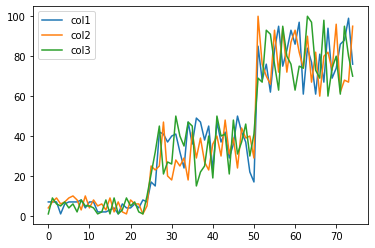

In [0]:
# Data Visualization
# https://plotly.com/python/v3/apache-spark/
# https://github.com/roshankoirala/pySpark_tutorial/blob/master/Data_visualization_in_pySpark%20.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Converte para Pandas Dataframe
clusterP = cluster_df.toPandas() 
clusterP.plot()  

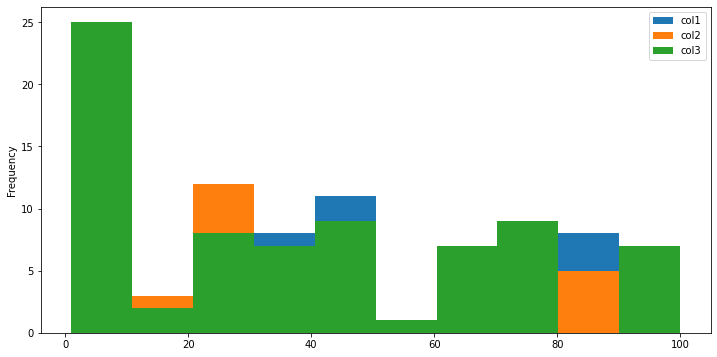

In [0]:
# https://matplotlib.org/stable/plot_types/index.html
clusterP.plot(kind='hist',figsize=(12,6)); #line, bar, hist

Out[62]: <seaborn.axisgrid.PairGrid at 0x7f845cd7dac0>

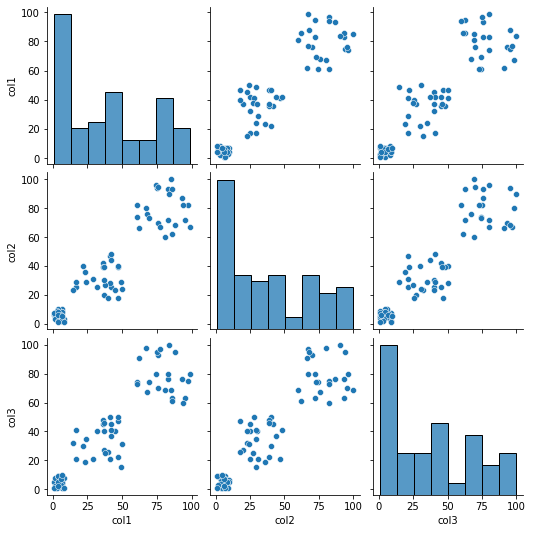

In [0]:
# Data Visualization Seaborn Pairplot
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(clusterP)

In [0]:
# Coverting the input data into features column
vectorAssembler = VectorAssembler(inputCols = ['col1', 'col2', 'col3'], outputCol = "features")
vcluster_df = vectorAssembler.transform(cluster_df)
vcluster_df.show(10)

+----+----+----+--------------+
|col1|col2|col3|      features|
+----+----+----+--------------+
|   7|   4|   1| [7.0,4.0,1.0]|
|   7|   7|   9| [7.0,7.0,9.0]|
|   7|   9|   6| [7.0,9.0,6.0]|
|   1|   6|   5| [1.0,6.0,5.0]|
|   6|   7|   7| [6.0,7.0,7.0]|
|   7|   9|   4| [7.0,9.0,4.0]|
|   7|  10|   6|[7.0,10.0,6.0]|
|   7|   8|   2| [7.0,8.0,2.0]|
|   8|   3|   8| [8.0,3.0,8.0]|
|   4|  10|   5|[4.0,10.0,5.0]|
+----+----+----+--------------+
only showing top 10 rows



In [0]:
# Applying the k-means algorithm
kmeans = KMeans().setK(3) # Define o número de Clusters
kmeans = kmeans.setSeed(1)
kmodel = kmeans.fit(vcluster_df) 

In [0]:
centers = kmodel.clusterCenters()
print("The location of centers: {}".format(centers))

The location of centers: [array([35.88461538, 31.46153846, 34.42307692]), array([80.        , 79.20833333, 78.29166667]), array([5.12, 5.84, 4.84])]


In [0]:
# Applying Hierarchical Clustering
bkmeans = BisectingKMeans().setK(3)
bkmeans = bkmeans.setSeed(1)
bkmodel = bkmeans.fit(vcluster_df)
bkcneters = bkmodel.clusterCenters()
bkcneters

Out[66]: [array([5.12, 5.84, 4.84]),
 array([35.88461538, 31.46153846, 34.42307692]),
 array([80.        , 79.20833333, 78.29166667])]

## Classification Using PySpark

In [0]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import  StringIndexer
# Read the iris data
df_iris = pd.read_csv("https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/iris.csv", header=None)
iris_df = spark.createDataFrame(df_iris) # Converte Pandas DataFrame para Spark DataFrame
iris_df.show(5, False)

+---+---+---+---+-----------+
|0  |1  |2  |3  |4          |
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
+---+---+---+---+-----------+
only showing top 5 rows



In [0]:
# Rename the columns
iris_df = iris_df.select(col("0").alias("sepal_length"),
                         col("1").alias("sepal_width"),
                         col("2").alias("petal_length"),
                         col("3").alias("petal_width"),
                         col("4").alias("species"),
                        )
# Converting the columns into features
vectorAssembler = VectorAssembler(inputCols = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
                                  outputCol = "features")
viris_df = vectorAssembler.transform(iris_df)
viris_df.show(5, False)

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species    |features         |
+------------+-----------+------------+-----------+-----------+-----------------+
|5.1         |3.5        |1.4         |0.2        |Iris-setosa|[5.1,3.5,1.4,0.2]|
|4.9         |3.0        |1.4         |0.2        |Iris-setosa|[4.9,3.0,1.4,0.2]|
|4.7         |3.2        |1.3         |0.2        |Iris-setosa|[4.7,3.2,1.3,0.2]|
|4.6         |3.1        |1.5         |0.2        |Iris-setosa|[4.6,3.1,1.5,0.2]|
|5.0         |3.6        |1.4         |0.2        |Iris-setosa|[5.0,3.6,1.4,0.2]|
+------------+-----------+------------+-----------+-----------+-----------------+
only showing top 5 rows



In [0]:
indexer = StringIndexer(inputCol="species", outputCol = "label")
iviris_df = indexer.fit(viris_df).transform(viris_df)
iviris_df.show(3,truncate=False)

+------------+-----------+------------+-----------+-----------+-----------------+-----+
|sepal_length|sepal_width|petal_length|petal_width|species    |features         |label|
+------------+-----------+------------+-----------+-----------+-----------------+-----+
|5.1         |3.5        |1.4         |0.2        |Iris-setosa|[5.1,3.5,1.4,0.2]|0.0  |
|4.9         |3.0        |1.4         |0.2        |Iris-setosa|[4.9,3.0,1.4,0.2]|0.0  |
|4.7         |3.2        |1.3         |0.2        |Iris-setosa|[4.7,3.2,1.3,0.2]|0.0  |
+------------+-----------+------------+-----------+-----------+-----------------+-----+
only showing top 3 rows



In [0]:
# Mostra valores distintos de especíe e rótulos
iviris_df.select("species","label").distinct().show()

+---------------+-----+
|        species|label|
+---------------+-----+
|    Iris-setosa|  0.0|
|Iris-versicolor|  1.0|
| Iris-virginica|  2.0|
+---------------+-----+



# Naive Bayes Classification

In [0]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create the traing and test splits
splits = iviris_df.randomSplit([0.6,0.4], 1) #Separa de forma aleatória em 60% para treinamento e 40% para testes
train_df = splits[0]
test_df = splits[1]

# Apply the Naive bayes classifier
nb = NaiveBayes(modelType="multinomial")
nbmodel = nb.fit(train_df) # Treina o modelo
predictions_df = nbmodel.transform(test_df) # Testa o Modelo
predictions_df.select("features","label","prediction").show(10, False)

+-----------------+-----+----------+
|features         |label|prediction|
+-----------------+-----+----------+
|[4.3,3.0,1.1,0.1]|0.0  |0.0       |
|[4.7,3.2,1.3,0.2]|0.0  |0.0       |
|[4.8,3.0,1.4,0.1]|0.0  |0.0       |
|[5.0,3.4,1.5,0.2]|0.0  |0.0       |
|[5.4,3.7,1.5,0.2]|0.0  |0.0       |
|[5.4,3.9,1.3,0.4]|0.0  |0.0       |
|[5.4,3.9,1.7,0.4]|0.0  |0.0       |
|[5.7,4.4,1.5,0.4]|0.0  |0.0       |
|[5.8,4.0,1.2,0.2]|0.0  |0.0       |
|[4.9,3.1,1.5,0.1]|0.0  |0.0       |
+-----------------+-----+----------+
only showing top 10 rows



In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
nbaccuracy = evaluator.evaluate(predictions_df)
nbaccuracy

Out[72]: 0.7704918032786885

# Multilayer Perceptron Classification

In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
# Define the MLP Classifier
layers = [4,5,5,3]
mlp = MultilayerPerceptronClassifier(layers = layers, seed=1)
mlp_model = mlp.fit(train_df)
mlp_predictions = mlp_model.transform(test_df)
mlp_predictions.select("label","prediction").show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



In [0]:
# Evaluate the MLP classifier
mlp_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
mlp_accuracy = mlp_evaluator.evaluate(mlp_predictions)
mlp_accuracy

Out[74]: 0.9836065573770492

# Decision Trees Classification

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
# Define the DT Classifier 
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_predictions.select("label","prediction").show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



In [0]:
# Evaluate the DT Classifier
dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
dt_accuracy

Out[76]: 0.9508196721311475

# Regression using PySpark

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
# Read the iris data
df_ccpp = pd.read_csv("https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/ccpp.csv")
pp_df = spark.createDataFrame(df_ccpp)
pp_df.show(2, False)

+-----+-----+-------+-----+------+
|AT   |V    |AP     |RH   |PE    |
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
+-----+-----+-------+-----+------+
only showing top 2 rows



In [0]:
# Create the feature column using VectorAssembler class
vectorAssembler = VectorAssembler(inputCols =["AT", "V", "AP", "RH"], outputCol = "features")
vpp_df = vectorAssembler.transform(pp_df)
vpp_df.show(2, False)

+-----+-----+-------+-----+------+---------------------------+
|AT   |V    |AP     |RH   |PE    |features                   |
+-----+-----+-------+-----+------+---------------------------+
|14.96|41.76|1024.07|73.17|463.26|[14.96,41.76,1024.07,73.17]|
|25.18|62.96|1020.04|59.08|444.37|[25.18,62.96,1020.04,59.08]|
+-----+-----+-------+-----+------+---------------------------+
only showing top 2 rows



# Linear Regression

In [0]:
# Define and fit Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="PE")
lr_model = lr.fit(vpp_df)
# Print and save the Model output
lr_model.coefficients
lr_model.intercept
lr_model.summary.rootMeanSquaredError

Out[79]: 4.557126016749484

# Decision Tree Regression

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
vpp_df.show(2, False)

+-----+-----+-------+-----+------+---------------------------+
|AT   |V    |AP     |RH   |PE    |features                   |
+-----+-----+-------+-----+------+---------------------------+
|14.96|41.76|1024.07|73.17|463.26|[14.96,41.76,1024.07,73.17]|
|25.18|62.96|1020.04|59.08|444.37|[25.18,62.96,1020.04,59.08]|
+-----+-----+-------+-----+------+---------------------------+
only showing top 2 rows



In [0]:
# Define train and test data split
splits = vpp_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]
# Define the Decision Tree Model 
dt = DecisionTreeRegressor(featuresCol="features", labelCol="PE")
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_predictions.select("features","PE","prediction").show(10, False)

+--------------------------+------+-----------------+
|features                  |PE    |prediction       |
+--------------------------+------+-----------------+
|[3.94,39.9,1008.06,97.49] |488.81|486.4664324324325|
|[4.71,39.42,1026.4,84.42] |481.28|486.4664324324325|
|[4.96,40.07,1011.8,67.38] |494.75|486.4664324324325|
|[4.97,42.85,1014.02,88.78]|482.98|481.9891999999998|
|[5.02,45.87,1007.8,99.22] |481.03|481.9891999999998|
|[5.1,35.57,1027.17,80.49] |489.96|486.4664324324325|
|[5.17,39.33,1009.68,94.19]|485.46|486.4664324324325|
|[5.37,38.68,1017.76,76.48]|487.07|486.4664324324325|
|[5.41,40.07,1019.16,64.77]|495.24|486.4664324324325|
|[5.48,40.07,1019.63,65.62]|495.76|486.4664324324325|
+--------------------------+------+-----------------+
only showing top 10 rows



In [0]:
# Evaluate the Model
dt_evaluator = RegressionEvaluator(labelCol="PE", predictionCol="prediction", metricName="rmse")
dt_rmse = dt_evaluator.evaluate(dt_predictions)
print("The RMSE of Decision Tree regression Model is {}".format(dt_rmse))

The RMSE of Decision Tree regression Model is 4.545967595853892


# Gradient Boosting Decision Tree Regression

In [0]:
from pyspark.ml.regression import GBTRegressor
# Define the GBT Model
gbt = GBTRegressor(featuresCol="features", labelCol="PE")
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
# Evaluate the GBT Model
gbt_evaluator = RegressionEvaluator(labelCol="PE", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
print("The RMSE of GBT Tree regression Model is {}".format(gbt_rmse))

The RMSE of GBT Tree regression Model is 4.108510515323464
